In [3]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size*math.floor(point/bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many are in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)
    
def plot_histogram(points: List[float], bucket_size: float, title: str):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

In [5]:
# Let's use above functions to plot some histograms
import random
from probability import inverse_normal_cdf;

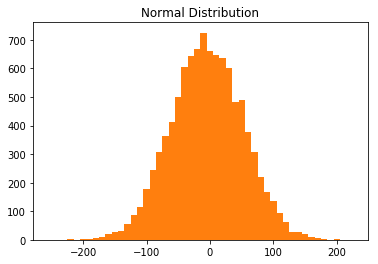

In [20]:
random.seed()
# sample 100 points uniformly between -100 and 100
uniform  = [200*random.random() - 100 for _ in range(100)]
# sample 100 points from normal distribution of mean 0 and std 57
normal = [57*inverse_normal_cdf(random.random()) for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Distribution")

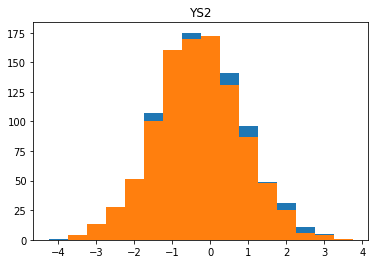

In [19]:
def random_normal() -> float:
    """Returns a random draw from standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal()/2 for x in xs]
ys2 = [-x + random_normal()/2  for x in xs]

plot_histogram(ys1, 0.5, "YS1")
plot_histogram(ys2, 0.5, "YS2")

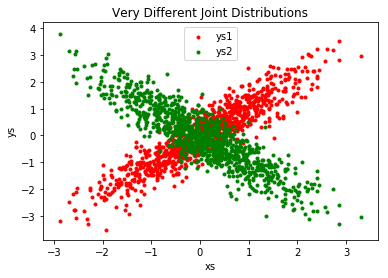

In [23]:
plt.scatter(xs, ys1, marker = '.', color = 'red', label = 'ys1')
plt.scatter(xs, ys2, marker = '.', color = 'green', label = 'ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title("Very Different Joint Distributions")
plt.show()

In [26]:
from statistics import correlation;
print(correlation(xs,ys1)) # about 0.9
print(correlation(xs,ys2)) # about -0.9

0.913612265472205
-0.8895558843140638


In [31]:
# Correlation matrix is a way to check pairwise correlations in 2 or more dimensions
from vector_operations import Vector; 
from matrix_operations import Matrix, make_matrix;

def correlation_matrix(data: List[Vector]) -> Matrix:
    """Creates a len(data) x len(data) matrix where (i-j)th element
    is correlation between data[i] and data[j]"""
    
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len([data[0]]), correlation_ij)

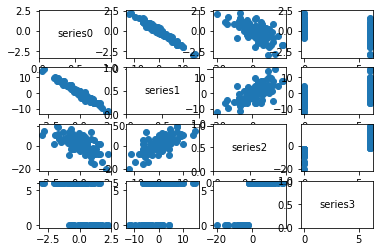

In [38]:
# corr_data is a list of four 100-d vectors

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):
        # Scatter column_j on the x-axis vs. column on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])
        # Unless i == j, in which case show the series name
        else: ax[i][j].annotate("series" + str(i), (0.5,0.5),
                               xycoords = 'axes fraction',
                               ha = "center", va = "center")
            
# Fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
#plt.show()

In [43]:
from collections import namedtuple
import datetime
StockPrice = namedtuple('StockPrice',['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018,12, 14), 106.3)

from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT','GOOG','FB','AMZN','AAPL']
    
price = StockPrice('MSFT', datetime.date(2018,12, 14), 106.3)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.3
assert price.is_high_tech()

In [48]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

from dateutil.parser import parse
import csv

with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

# skip header
maybe_data = [try_parse_row(row) for row in rows]

# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]


[StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857),
 StockPrice(symbol='AAPL', date=datetime.date(1980, 12

In [50]:
max_aapl_price = max(stock_price.closing_price 
                     for stock_price in data 
                     if stock_price.symbol == 'AAPL')
print(max_aapl_price)

232.070007


In [54]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))
    
for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price
max_prices

defaultdict(<function __main__.<lambda>()>,
            {'AAPL': 232.070007,
             'MSFT': 115.610001,
             'FB': 217.5,
             'GOOG': 1268.329956})

In [62]:
from typing import List
prices: Dict[str, List[float]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)
# order (or sort) the prices by date
prices = {symbol: sorted(symbol_prices) 
          for symbol, symbol_prices in prices.items()}
#print(prices)

{'AAPL': [StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 12), closing_price=0.513393), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 15), closing_price=0.486607), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 16), closing_price=0.450893), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 17), closing_price=0.462054), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 18), closing_price=0.475446), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 19), closing_price=0.504464), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 22), closing_price=0.529018), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 23), closing_price=0.551339), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 24), closing_price=0.580357), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 26), closing_price=0.633929), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 29), closing_price=0.642857), StockPrice(symbol='AAPL', date=datetime.date(1980, 12, 

In [76]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float
    
def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """Assumes prices are for once stock and are ordered"""
    return [DailyChange(symbol = today.symbol,
                           date = today.date,
                           pct_change = pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

all_changes = [change for symbol_prices in prices.values()
              for change in day_over_day_changes(symbol_prices)]
max_change = max(all_changes, key = lambda change: change.pct_change)

changes_by_month: List[DailyChange] = {month: [] for month in range(1,13)}
    
for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {month: sum(change.pct_change for change in changes)/ len(changes)
                   for month, changes in changes_by_month.items()}

assert avg_daily_change[10] == max(avg_daily_change.values())

In [83]:
from typing import Tuple
from vector_operations import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """Returns mean and standard deviation of each feature"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
             for i in range(dim)]
    return means, stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """Rescales the data so that each feature has
    mean 0 and standard deviation 1, leaves the
    feature which has 0 standard deviation."""
    dim = len(data[0])
    means, stdevs = scale(data)
    
    # Make a copy of each vector
    rescaled = [v[:] for v in data]
    
    for v in rescaled:
        for i in range(dim):
            v[i] = (v[i] - means[i])/ stdevs[i]
            
    return rescaled


In [86]:
import tqdm

for i in tqdm.tqdm(range(100)):
    _ = [random.random for _ in range(10000000)]

100%|██████████| 100/100 [01:34<00:00,  1.01s/it]


In [88]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    
    with tqdm.trange(3,n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
                
            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(1000)

168 primes: 100%|██████████| 997/997 [00:01<00:00, 677.32it/s]


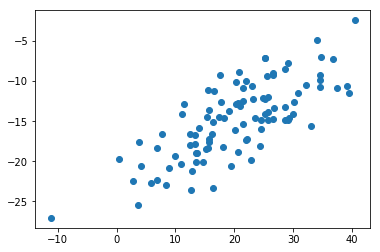

In [100]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

plt.scatter(*zip(*pca_data))

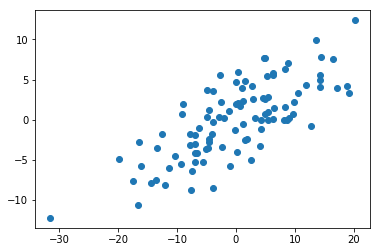

In [101]:
# Dimentionality reduction by prinicipal component analysis
from vector_operations import subtract
def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have 0 mean in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]
pca_data = de_mean(pca_data)

plt.scatter(*zip(*pca_data))

In [117]:
from vector_operations import magnitude, dot

def direction(w: Vector) -> Vector:
    """Computes a unit vector"""
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance(data: List[Vector], w: Vector) -> float:
    """Returns the variace of each vector of data matrix
    in the direction of vector w"""
    w_dir = direction(w)
    return [dot(v,w_dir) ** 2 for v in data]

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """The gradient of directional variance w.r.t v"""
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
           for i in range(len(w))]

from gradient_descent import gradient_step;

# Use gradient ascent to find the direction that maximizes data varaince
# gradient ascent will used + step size 
def first_principal_component(data: List[Vector],
                              n: int = 100,
                              step_size: float = 0.1) -> Vector:
    # Start with a random direction
    guess = [1.0 for _ in data[0]]
    
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv}")
           
    return direction(guess)

# directional vetor of the first principal component
pca1 = first_principal_component(pca_data)


dv: [1.5919452889207217, 0.11162039957636091, 36.4025547649421, 11.728489502502454, 6.3054693783325995, 409.1411976464874, 83.82938013669161, 0.5462659150557589, 4.768848492476459, 3.850536813148179, 263.53718173994434, 217.6040428594683, 50.931247036952826, 7.232500531801361, 27.233703089683054, 0.5477907044993009, 0.26388630980894356, 13.507324864098399, 67.78295966206943, 70.13649830855653, 36.833917659713805, 62.81150607293555, 99.42289309223996, 329.6646373521476, 159.02482358322735, 267.28038443536576, 25.2543636846306, 19.704656821177355, 51.08779881606417, 190.25852253860643, 64.99131775830777, 1143.1476522469352, 163.9832972890635, 6.726703383013999, 363.4921548740514, 122.20171442360089, 9.388707436498311, 57.899598294900905, 546.9038273357406, 13.902881092109721, 9.580837565714676, 63.552565331962946, 150.63412511151375, 0.824646397014724, 109.49196159980754, 71.29373158385135, 8.953570007916698, 59.362114009082894, 19.516082109120678, 3.3772730813077505, 1.403973058739719, 

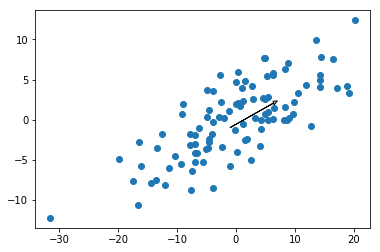

In [127]:
ax = plt.axes()
ax.arrow(-1, -1.0, 8*pca1[0], 8*pca1[1], 
         head_width=0.5, head_length=0.7, 
         fc='lightblue', ec='black')
ax.scatter(*zip(*pca_data))

In [144]:
# First prinical component is the projection of v on the 
# first principal component direction 
from vector_operations import scalar_multiply
def project(v: Vector, w: Vector) -> Vector:
    """Return the projection of v onto the direction w"""
    projection_length = dot(v,w)
    return scalar_multiply(projection_length, w)

In [145]:
# For finding other principal components, just remove the projection of 
# previous previous components from the data matrix
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the projection from v"""
    return subtract(v,project(v,w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

pr_data = remove_projection(pca_data, pca1)

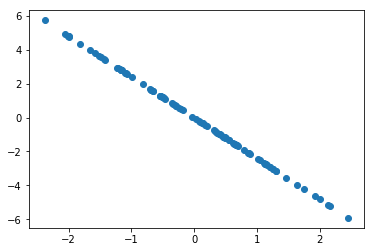

In [146]:
plt.scatter(*zip(*pr_data))

In [147]:
## Iteratively find multiple principal components from a high-dimensional dataset
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v,w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]